In [1]:
#import basic libraries
#import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [2]:
#To load the dataset
df=pd.read_csv('BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
#To check number of rows and columns
df.shape

(506, 14)

In [4]:
#To get the statistics information about dataset
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
#To check the null values
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

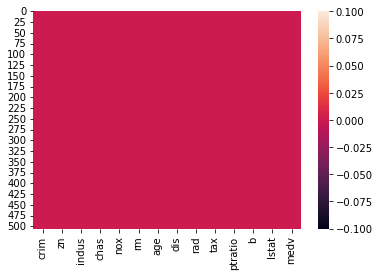

In [6]:
#To visualize the null values
sb.heatmap(df.isnull())
plt.show()

In [7]:
#To check the datatype
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

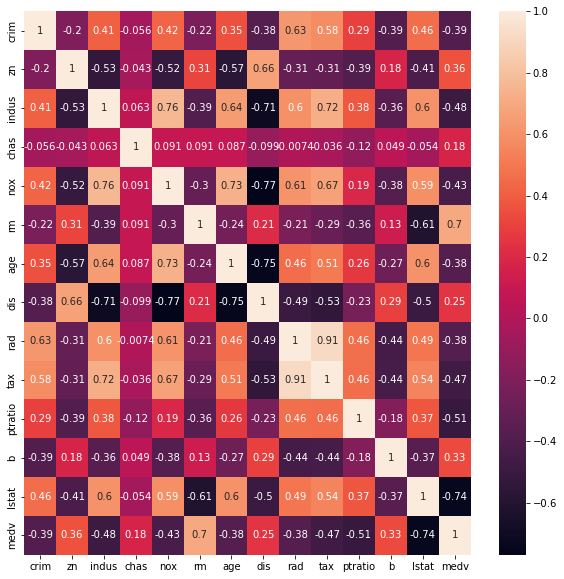

In [8]:
#To check/visualize  the correlation
plt.figure(figsize=(10,10))
sb.heatmap(df.corr(),annot=True)
plt.show()

In [9]:
#Select input and ouptut
X=df.drop('medv',axis=1) #select=input
Y=df['medv'] #select=output

In [10]:
X.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')

In [11]:
#To split the data into training and testing
#We have to import inbuilt library from sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [12]:
X_train.shape,X_test.shape

((354, 13), (152, 13))

In [13]:
#To do scaling on input data 
#We are going to use standardscalar on dataset for scaling
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)
type(X_test),type(X_train)

(numpy.ndarray, numpy.ndarray)

In [14]:
#To train the data with LinearRegression using inbuilt function
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [15]:
#To fit the data in machine
lr.fit(X_train,Y_train)

LinearRegression()

In [16]:
#To check the slope
slope=lr.coef_
print("Slope:",slope)

Slope: [-0.83884271  1.42840065  0.40532651  0.67942473 -2.53039124  1.93381643
  0.10090715 -3.23615418  2.70318306 -1.91729896 -2.15578621  0.58227649
 -4.13433172]


In [17]:
#To make dataframe of slopes
dict={'Input':X.columns,'Slope_Linear':slope}
df1=pd.DataFrame(dict)
df1

,Input,Slope_Linear
0,crim,-0.838843
1,zn,1.428401
2,indus,0.405327
3,chas,0.679425
4,nox,-2.530391
5,rm,1.933816
6,age,0.100907
7,dis,-3.236154
8,rad,2.703183
9,tax,-1.917299


In [18]:
#To check the intercept
print("Intercept",lr.intercept_)

Intercept 22.33983050847458


In [19]:
#To get the predicted output using predict with testing data
Y_pred=lr.predict(X_test)

In [20]:
#To create the dataframe of actual output and predicted output
dict={'Actual Output':Y_test,'Predicted Output':Y_pred}
df2=pd.DataFrame(dict)
df2.head()

,Actual Output,Predicted Output
307,28.2,32.391465
343,23.9,27.944013
47,16.6,17.837628
67,22.0,21.669414
362,20.8,18.936396


In [21]:
#Evaluate the model
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y_test,Y_pred)
print("Mean_Squared_Error:",mse)
rmse=np.sqrt(mse)
print("Root_Mean_Squared_Error",rmse)

Mean_Squared_Error: 19.83132367206312
Root_Mean_Squared_Error 4.453237437198147


In [22]:
from sklearn.metrics import r2_score
print("The r2_score is :",r2_score(Y_test,Y_pred))
#The r2_score is  good and not best.
#r2_score must be above 85%.

The r2_score is : 0.7836295385076293


In [23]:
#To check overfitting 
#To check the training and testing scores
#Difference between the score should be 2 max
#If training score is less than testing score then model is underfit:so apply cross validation
#If training score is greater than testing score then model is overfit:then apply regularization

print('Training Score',lr.score(X_train,Y_train))
print('Testing Score',lr.score(X_test,Y_test))


Training Score 0.7103879080674731
Testing Score 0.7836295385076293


In [24]:
#Cross validation is apply for underfit after training the model.

In [25]:
#call inbuilt class for cross-validation
#cross_val_score is the inbuilt class
from sklearn.model_selection import cross_val_score

In [26]:
#create object of cross_val_score
#It gives r2_score
lr_score=cross_val_score(lr,X_train,Y_train,cv=5)
print(lr_score)

[0.49928471 0.79566051 0.60481958 0.71988078 0.70189495]


In [27]:
#find the mean
lr_score.mean() #testing score

0.664308107719913

In [28]:
#We have done heat and trail method cv=10 but the score is same
#From here we can see that testing score is less than training score

In [29]:
#check variance
#find residual =Y_pred-Y_test
#find Y_pred
Y_pred=lr.predict(X_test)

In [30]:
residual=Y_pred-Y_test
residual

307    4.191465
343    4.044013
47     1.237628
67    -0.330586
362   -1.863604
         ...   
467   -1.770041
95    -0.039766
122    0.294228
260   -0.101843
23    -0.981173
Name: medv, Length: 152, dtype: float64

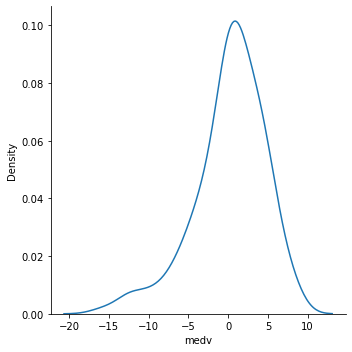

In [31]:
#To see the distribution
sb.displot(residual,kind='kde')#To show only distribution
plt.show()

In [32]:
#create object of cross_val_score
#scoring parameter gives negative mean squared error
#If we not give bydefault it will give r2score
mse=cross_val_score(lr,X_train,Y_train,cv=10,scoring='neg_mean_squared_error')
print(mse)

[-25.3373018  -42.11726715 -18.46383118 -22.14831964 -11.06355679
 -38.46957076 -31.90922818 -23.61549677 -35.01490246 -11.48471174]


In [33]:
#find the average of mse
#Here the mean of mse is low with cv=10
#Here 10 is best
mse.mean()

-25.96241864651527

In [34]:
residual=Y_test-Y_pred
residual

307   -4.191465
343   -4.044013
47    -1.237628
67     0.330586
362    1.863604
         ...   
467    1.770041
95     0.039766
122   -0.294228
260    0.101843
23     0.981173
Name: medv, Length: 152, dtype: float64

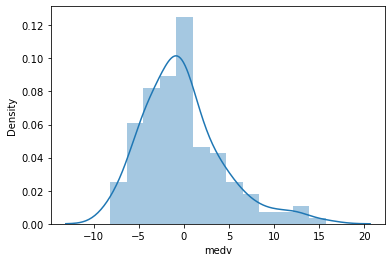

In [35]:
#To see the distribution
sb.distplot(residual)#To show only distribution
plt.show()

In [36]:
#r2_score
r2_score(Y_test,Y_pred)

0.7836295385076293

In [ ]:
#Conclusion:
#Hence we come to the conclusion that Boston Housing dataset is underfit.
#Hence we have to add more features to get the better model.